In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\Desktop\simulacion_3\\Notebooks\data_latinoamerica.csv')

In [3]:
df = df[df['location_key'] == 'PE']

In [16]:
df.head(20)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
10252886,PE,2020-01-01,PE,Peru,0.0,0.0,0.0,0.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6,NaN,NaN
10252887,PE,2020-01-02,PE,Peru,0.0,0.0,0.0,0.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6,NaN,NaN
10252888,PE,2020-01-03,PE,Peru,0.0,0.0,0.0,0.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6,NaN,NaN
10252889,PE,2020-01-04,PE,Peru,0.0,0.0,0.0,0.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6,NaN,NaN
10252890,PE,2020-01-05,PE,Peru,0.0,0.0,0.0,0.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6,NaN,NaN
10252891,PE,2020-01-06,PE,Peru,0.0,0.0,0.0,0.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6,NaN,NaN
10252892,PE,2020-01-07,PE,Peru,0.0,0.0,0.0,0.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6,NaN,NaN
10252893,PE,2020-01-08,PE,Peru,0.0,0.0,0.0,0.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6,NaN,NaN
10252894,PE,2020-01-09,PE,Peru,0.0,0.0,0.0,0.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6,NaN,NaN
10252895,PE,2020-01-10,PE,Peru,0.0,0.0,0.0,0.0,NaN,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6,NaN,NaN


In [4]:
# Identificar las columnas que contienen valores 0
columns_with_zeros = df.columns[(df == 0).any()]

# Mostrar las columnas y las filas con valores 0
for column in columns_with_zeros:
    zero_rows = df[df[column] == 0]
    print(f"Column '{column}' has zero values in the following rows:")
    print(zero_rows)

# Alternativamente, para ver solo las columnas que tienen valores 0
print("Columns with zero values:", columns_with_zeros.tolist())

Column 'new_confirmed' has zero values in the following rows:
         location_key        date country_code country_name  new_confirmed  \
10252886           PE  2020-01-01           PE         Peru            0.0   
10252887           PE  2020-01-02           PE         Peru            0.0   
10252888           PE  2020-01-03           PE         Peru            0.0   
10252889           PE  2020-01-04           PE         Peru            0.0   
10252890           PE  2020-01-05           PE         Peru            0.0   
...               ...         ...          ...          ...            ...   
10253196           PE  2020-11-06           PE         Peru            0.0   
10253226           PE  2020-12-06           PE         Peru            0.0   
10253742           PE  2022-05-06           PE         Peru            0.0   
10253768           PE  2022-06-01           PE         Peru            0.0   
10253866           PE  2022-09-07           PE         Peru            0.0   

 

### Contar cuantos valores Nulos tiene cada columna

In [5]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
new_confirmed                              4
new_deceased                               4
cumulative_confirmed                       4
cumulative_deceased                        4
cumulative_vaccine_doses_administered    410
average_temperature_celsius                9
minimum_temperature_celsius                9
maximum_temperature_celsius                9
rainfall_mm                               14
relative_humidity                          9
new_recovered                            991
cumulative_recovered                     991
dtype: int64


### Contar cuantos 0 tiene cada columna

In [6]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 69 rows with zero values.
Column 'new_deceased' has 73 rows with zero values.
Column 'cumulative_confirmed' has 64 rows with zero values.
Column 'cumulative_deceased' has 62 rows with zero values.
Column 'rainfall_mm' has 593 rows with zero values.

Counts of zero values per column: {'new_confirmed': 69, 'new_deceased': 73, 'cumulative_confirmed': 64, 'cumulative_deceased': 62, 'rainfall_mm': 593}


# Transformacion de DF

#### Realizo un filtrado debido que anterior y posterior a estas fechas hay valores nulos y/o datos errones

In [18]:
# Definir el rango de fechas
start_date = '2020-01-01'
end_date = '2022-08-31'

# Filtrar el DataFrame para mantener las filas dentro del rango de fechas
df_pe = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

#### Elimino estas columnas por: 
#### las 2 primeras columnas tienen valores errones
#### la 3ra columna tiene muchos valores en 0
#### la 4 y 5ta columna tienen puros valores nulos
#### la 6 y 7ma columna no concuerdan con el de poblacion 
#### Prefiero trabajar con el promedio de la temperatura del dia

In [19]:
columns_to_drop = [
    'cumulative_confirmed', 
    'cumulative_deceased', 
    'rainfall_mm', 
    'new_recovered',
    'cumulative_recovered',
    'population_rural',
    'population_urban', 
    'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Eliminar las columnas
df_pe.drop(columns=columns_to_drop, inplace=True)


C:\Users\Kuma\AppData\Local\Temp\ipykernel_23360\1167882333.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe.drop(columns=columns_to_drop, inplace=True)


In [32]:
df_pe.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
10252948,PE,2020-03-03,PE,Peru,0.0,1.0,NaN,29381884.0,14450757.0,14931127.0,...,25.972222,65.881688,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6
10252949,PE,2020-03-04,PE,Peru,0.0,1.0,NaN,29381884.0,14450757.0,14931127.0,...,24.166667,76.687271,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6
10252950,PE,2020-03-05,PE,Peru,9.0,0.0,NaN,29381884.0,14450757.0,14931127.0,...,25.481481,70.575962,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6
10252951,PE,2020-03-06,PE,Peru,1.0,0.0,NaN,29381884.0,14450757.0,14931127.0,...,23.166667,80.157246,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6
10252952,PE,2020-03-07,PE,Peru,5.0,1.0,NaN,29381884.0,14450757.0,14931127.0,...,24.925926,69.948151,10554712.0,1256339.0,16425.0,76.516,146.37,84.815,63.9,12.6


In [20]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df_pe.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
cumulative_vaccine_doses_administered    405
average_temperature_celsius                5
relative_humidity                          5
dtype: int64


In [21]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 69 rows with zero values.
Column 'new_deceased' has 73 rows with zero values.
Column 'cumulative_confirmed' has 64 rows with zero values.
Column 'cumulative_deceased' has 62 rows with zero values.
Column 'rainfall_mm' has 593 rows with zero values.

Counts of zero values per column: {'new_confirmed': 69, 'new_deceased': 73, 'cumulative_confirmed': 64, 'cumulative_deceased': 62, 'rainfall_mm': 593}


#### Vamos a imputar las columnas que tienen valores nulos y ceros 

In [22]:
# Imputación con la media para columnas específicas
df_pe['average_temperature_celsius'] = df_pe['average_temperature_celsius'].fillna(df_pe['average_temperature_celsius'].mean())
df_pe['relative_humidity'] = df_pe['relative_humidity'].fillna(df_pe['relative_humidity'].mean())

C:\Users\Kuma\AppData\Local\Temp\ipykernel_23360\557545078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe['average_temperature_celsius'] = df_pe['average_temperature_celsius'].fillna(df_pe['average_temperature_celsius'].mean())
C:\Users\Kuma\AppData\Local\Temp\ipykernel_23360\557545078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe['relative_humidity'] = df_pe['relative_humidity'].fillna(df_pe['relative_humidity'].mean())


In [55]:
df_pe.isna().sum()

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_age_70_79                     0
population_age_80_and_older              0
gdp_usd                                  0
gdp_per_capita_usd                       0
latitude   

In [23]:
# Calcular la mediana de la columna 'new_confirmed' y 'new_deceased'
median_new_confirmed = df_pe['new_confirmed'].median()
median_new_deceased = df_pe['new_deceased'].median()

# Fechas específicas para imputar
dates_to_impute = ['2022-05-06', '2022-06-01']

# Reemplazar valores cero por la mediana en las fechas específicas
for date in dates_to_impute:
    df_pe.loc[(df['date'] == date) & (df_pe['new_confirmed'] == 0), 'new_confirmed'] = median_new_confirmed
    df_pe.loc[(df['date'] == date) & (df_pe['new_deceased'] == 0), 'new_deceased'] = median_new_deceased


In [24]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df_pe.columns[(df_pe == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df_pe[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 66 rows with zero values.
Column 'new_deceased' has 70 rows with zero values.

Counts of zero values per column: {'new_confirmed': 66, 'new_deceased': 70}


In [25]:
fecha_limite = '2021-02-09'
df_pe.loc[df_pe['date'] < fecha_limite] = df_pe.loc[df_pe['date'] < fecha_limite].fillna(0)
df_pe.isna().sum()

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_age_70_79                     0
population_age_80_and_older              0
gdp_usd                                  0
gdp_per_capita_usd                       0
latitude   

In [26]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pe.describe()

,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_density,human_development_index,population_age_00_09,population_age_10_19,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,4233.86,221.98,23351630.68,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,25.08,71.03,10554712.00,1256339.00,16425.00,76.52,146.37,84.82,63.90,12.60
std,6686.98,249.86,30152080.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.11,8.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,17.44,41.59,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
25%,904.75,29.00,0.00,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,23.56,66.04,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
50%,2118.50,101.50,1927555.00,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,24.90,71.28,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
75%,5669.25,434.75,51074441.25,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,26.50,76.55,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
max,58128.00,847.00,83274069.00,29381884.00,14450757.00,14931127.00,25.76,0.75,5140624.00,5035905.00,...,32.00,94.82,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60


In [27]:
#calcular columna vacunas administradas por dia
g=df_pe.cumulative_vaccine_doses_administered.tolist()
h=[0.0]
for i in range(1,len(g)):
    h.append(g[i]-g[i-1])
df_pe['vaccine_doses_administered_for_day']=h

df_pe.vaccine_doses_administered_for_day.max()

C:\Users\Kuma\AppData\Local\Temp\ipykernel_23360\2758860165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe['vaccine_doses_administered_for_day']=h


603810.0

In [28]:
df_pe.drop(columns='cumulative_vaccine_doses_administered', inplace=True)

C:\Users\Kuma\AppData\Local\Temp\ipykernel_23360\3440832085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe.drop(columns='cumulative_vaccine_doses_administered', inplace=True)


In [29]:
col = list(df_pe.columns)
col.remove('vaccine_doses_administered_for_day')
col.insert(6, 'vaccine_doses_administered_for_day')
df_pe = df_pe[col]
df_pe

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
10252886,PE,2020-01-01,PE,Peru,0.00,0.00,0.00,29381884.00,14450757.00,14931127.00,...,23.37,77.49,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252887,PE,2020-01-02,PE,Peru,0.00,0.00,0.00,29381884.00,14450757.00,14931127.00,...,22.89,79.09,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252888,PE,2020-01-03,PE,Peru,0.00,0.00,0.00,29381884.00,14450757.00,14931127.00,...,24.18,72.81,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252889,PE,2020-01-04,PE,Peru,0.00,0.00,0.00,29381884.00,14450757.00,14931127.00,...,24.81,74.27,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252890,PE,2020-01-05,PE,Peru,0.00,0.00,0.00,29381884.00,14450757.00,14931127.00,...,24.79,65.88,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253855,PE,2022-08-27,PE,Peru,2878.00,46.00,79985.00,29381884.00,14450757.00,14931127.00,...,28.65,62.82,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253856,PE,2022-08-28,PE,Peru,2255.00,37.00,51292.00,29381884.00,14450757.00,14931127.00,...,29.72,63.93,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253857,PE,2022-08-29,PE,Peru,1138.00,46.00,53507.00,29381884.00,14450757.00,14931127.00,...,24.17,82.08,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253858,PE,2022-08-30,PE,Peru,1718.00,60.00,25986.00,29381884.00,14450757.00,14931127.00,...,24.93,77.52,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60


In [30]:
# Crear la columna del acumulado de vacunas diarias
df_pe['cumulative_vaccine_doses_administered'] = df_pe['vaccine_doses_administered_for_day'].cumsum()

col = list(df_pe.columns)
col.remove('cumulative_vaccine_doses_administered')
col.insert(7, 'cumulative_vaccine_doses_administered')
df_pe = df_pe[col]
df_pe

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,cumulative_vaccine_doses_administered,population,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
10252886,PE,2020-01-01,PE,Peru,0.00,0.00,0.00,0.00,29381884.00,14450757.00,...,23.37,77.49,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252887,PE,2020-01-02,PE,Peru,0.00,0.00,0.00,0.00,29381884.00,14450757.00,...,22.89,79.09,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252888,PE,2020-01-03,PE,Peru,0.00,0.00,0.00,0.00,29381884.00,14450757.00,...,24.18,72.81,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252889,PE,2020-01-04,PE,Peru,0.00,0.00,0.00,0.00,29381884.00,14450757.00,...,24.81,74.27,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10252890,PE,2020-01-05,PE,Peru,0.00,0.00,0.00,0.00,29381884.00,14450757.00,...,24.79,65.88,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253855,PE,2022-08-27,PE,Peru,2878.00,46.00,79985.00,83088106.00,29381884.00,14450757.00,...,28.65,62.82,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253856,PE,2022-08-28,PE,Peru,2255.00,37.00,51292.00,83139398.00,29381884.00,14450757.00,...,29.72,63.93,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253857,PE,2022-08-29,PE,Peru,1138.00,46.00,53507.00,83192905.00,29381884.00,14450757.00,...,24.17,82.08,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60
10253858,PE,2022-08-30,PE,Peru,1718.00,60.00,25986.00,83218891.00,29381884.00,14450757.00,...,24.93,77.52,10554712.00,1256339.00,16425.00,76.52,146.37,84.81,63.90,12.60


In [31]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_pe['vaccine_doses_administered_for_day'].quantile(0.25)
Q3 = df_pe['vaccine_doses_administered_for_day'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df_pe[(df_pe['vaccine_doses_administered_for_day'] >= lower_bound) & (df_pe['vaccine_doses_administered_for_day'] <= upper_bound)]

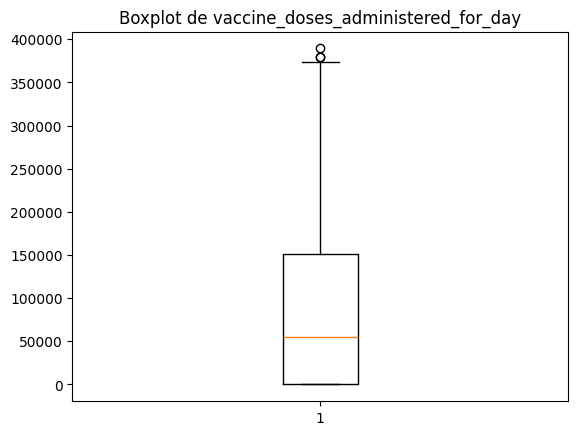

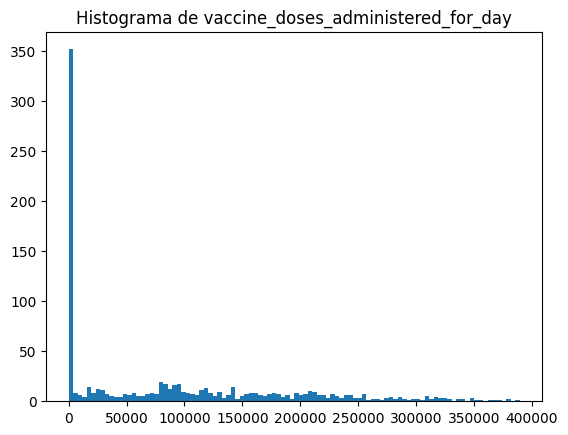

In [71]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Histograma con matplotlib
plt.hist(df_filtered['vaccine_doses_administered_for_day'], bins=100) # el número de bins se puede ajustar a preferencia 
plt.title('Histograma de vaccine_doses_administered_for_day')
plt.show()

In [32]:
avg_vaccine = (upper_bound - lower_bound)/2
df_prueba = df_pe
# Reemplazar los valores por encima del valor máximo con el promedio
df_prueba['vaccine_doses_administered_for_day'] = df_prueba['vaccine_doses_administered_for_day'].apply(
    lambda x: avg_vaccine if x > upper_bound else x
)

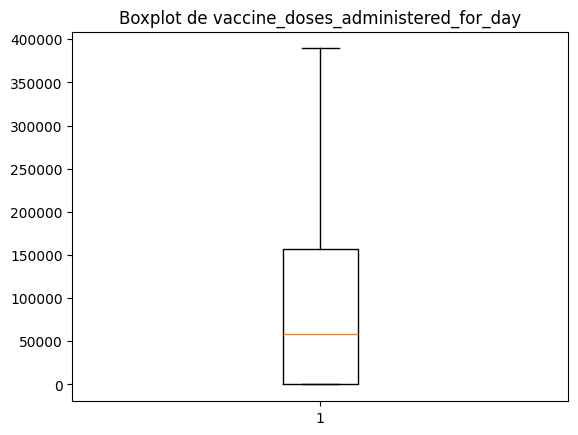

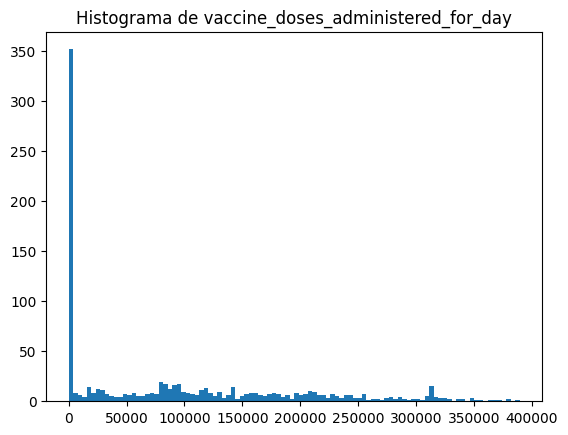

In [73]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_prueba['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Histograma con matplotlib
plt.hist(df_prueba['vaccine_doses_administered_for_day'], bins=100) # el número de bins se puede ajustar a preferencia 
plt.title('Histograma de vaccine_doses_administered_for_day')
plt.show()

In [33]:
df_prueba.to_csv('data\processed\covid19_Peru2.csv', index=False)